In [102]:
import sys

sys.path.append("../")
from electro_static import electro_static_potential
import numpy as np


In [103]:
cell = np.diag((1.0, 1.0, 1.0))
r = np.array(
    [
        [0.0, 0.0, 0.0],
        [0.5, 0.5, 0.0],
        [0.5, 0.0, 0.5],
        [0.0, 0.5, 0.5],
        [0.5, 0.0, 0.0],
        [0.0, 0.5, 0.0],
        [0.0, 0.0, 0.5],
        [0.5, 0.5, 0.5],
    ]
)
q = np.array([1, 1, 1, 1, -1, -1, -1, -1])
i = 0
V = electro_static_potential(i, r, q, cell, alpha=3)
V = -0.5 * V
refV = 1.7475645946331822
print(f"Calculation of Madelung constant {V}: \n Actuall Madelung constant {refV}")


Calculation of Madelung constant 1.747564594633188: 
 Actuall Madelung constant 1.7475645946331821


In [115]:
from core import RotateStructure,get_electrostatic_energy,get_U_mean_distance
rotator=RotateStructure()

In [113]:
energies_pymat = []
phi_mesh = np.linspace(0, 180, 50)
theta_mesh = np.linspace(0, 360, 50)
for theta in theta_mesh:
    tmp = []
    for phi in phi_mesh:
        s = rotator.get_rotated_structure(phi,theta)
        tmp.append(get_electrostatic_energy(s))
    energies_pymat.append(tmp)
energies_pymat = np.array(energies_pymat)

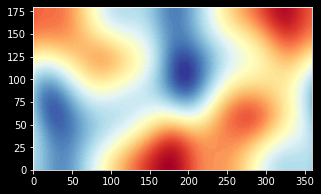

In [114]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.contourf(theta_mesh, phi_mesh, energies_pymat.T, 100, cmap="RdYlBu")

In [119]:
def get_total_energy(structure,alpha,beta,gamma):
    U=alpha*get_electrostatic_energy(structure)
    D=beta*get_U_mean_distance(structure)
    return U+D+gamma

In [158]:
phi=0
energy_U=[]
energy_E=[]

for theta in np.linspace(0, 360, 50):
        s = rotator.get_rotated_structure(phi,theta)
        energy_U.append(get_total_energy(s,0,1,1))
        energy_E.append(get_total_energy(s,1,0,1))

In [160]:
def create_spehircal_mesh_points(n,start_from_zero=True):
    t=np.linspace(0,np.rad2deg(2*np.pi),n)
    p=np.linspace(0,np.rad2deg(np.pi),n)
    if not start_from_zero:
        t=np.linspace(0,np.rad2deg(2*np.pi),n)
        p=np.linspace(-np.rad2deg(np.pi/2),np.rad2deg(np.pi/2),n)
    return t,p

In [170]:
nk=51
t,p=create_spehircal_mesh_points(nk)

In [171]:
# angles_distance=np.array([get_total_energy(theta=i,phi=j) for i in t for j in p]).reshape(nk,nk)
U=np.zeros((nk,nk))
for ni,i in enumerate(t):
    for nj,j in enumerate(p):
        U[ni,nj]=get_total_energy(rotator.get_rotated_structure(i,j),0,1,1)

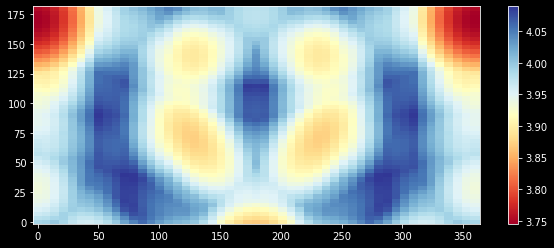

In [173]:
fig,ax=plt.subplots(1,1,figsize=(10,4))
plt.pcolor(t,p,U.T,cmap="RdYlBu",shading="auto")
plt.colorbar()